In [1]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

import re

import nltk

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

In [3]:
# IMPORT TRAINING DATASET

train_data = pd.read_csv("/content/train_data_chatbot.csv.zip")

train_data.head()

,short_question,short_answer,tags,label
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0


In [4]:
# IMPORT TESTING DATASET

test_data = pd.read_csv("/content/validation_data_chatbot.csv.zip")

test_data.head()

,short_question,short_answer,tags,label
0,do i have a yeast infection,hi this can be a vaginal fungal infection whic...,['yeast infection'],1.0
1,does your upper backlung area hurt badly with ...,if you have a true allergy to sulfa medication...,['asthma' 'ibuprofen' 'lung' 'cough' 'inhaler'],-1.0
2,taken off paxil cold turk now on celexa having...,if overdose is suspected contact a poison cont...,['brain' 'lightheadedness' 'dizziness' 'coldne...,-1.0
3,i need to buy health insurance asap what do i ...,go to healthcare gov call my husband 407 222 9...,[''],1.0
4,what happens if a pregnant woman has genital h...,sorry for her pain i understand your feelings ...,['genital herpes' 'pregnancy'],-1.0


In [5]:
# CONCATENATE THE DATASETS

df = pd.concat([train_data, test_data], ignore_index = True)

df.to_csv("Medical_data.csv",index=False)

df.head()

,short_question,short_answer,tags,label
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0


In [6]:
# DECLARE DEPENDENT AND INDEPENDENT VARIABLES AND FIND THEIR SIZE

X = df["short_question"]

Y = df["short_answer"]

print("Shape of X",X.shape)

print("Shape of Y",Y.shape)

Shape of X (59504,)
Shape of Y (59504,)


In [7]:
# CHECK FOR MISSING VALUES IN THE DATASET

print("\nMissing values in the dataset:")

print(df.isnull().sum())


Missing values in the dataset:
short_question    0
short_answer      0
tags              0
label             0
dtype: int64


In [8]:
# REMOVING NOISE

def remove_noise(text):

    text = re.sub(r'<.*?>', '', str(text)) # Removes Hyperlinks

    text = re.sub(r'[^\w\s.]', '', text)   # Removes non-alphanumeric characters except spaces and fullstops

    text = re.sub(r'[\x00-\x1F]+', '', str(text))  # Removes ASCII control characters (0-31)

    return text

df['cleaned_short_question'] = df['short_question'].apply(remove_noise)

df['cleaned_short_answer'] = df['short_answer'].apply(remove_noise)

# df_cleaned = df.applymap(remove_noise)

# df_cleaned.head()

df.head()

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# REMOVE STOPWORDS EXCEPT THE WORDS THAT ARE NEEDED

stop_words = set(stopwords.words('english'))

# negative_words = {"not", "no", "never", "n't", "neither", "nor", "wasn't", "weren't", "haven't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shouldn't", "couldn't", "can't","mustn't","shan't","mightn't","doesn'","haven","mustn","shouldn","couldn","mightn","won","didn","isn","aren't","isn't","wasn","wouldn","hasn't","hadn","needn't","weren"}

negative_words = {"not", "no", "never", "n't", "neither", "nor", "wasn't", "weren't", "haven't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shouldn't", "couldn't", "can't","mustn't","shan't","mightn't","aren't","isn't","hasn't","needn't"}

# s = [word for word in stop_words if word not in negative_words]

# print(s)



def remove_stopwords(text):

    words = text.split()  # Split text into words

    filtered_words = [word for word in words if word.lower() not in stop_words or word.lower() in negative_words]  # Remove stopwords

    return ' '.join(filtered_words)  # Join filtered words back into a string



# Apply stopword removal to all columns

# stdf = df.applymap(remove_stopwords)

# stdf.head()



df['c_short_question_no_stopwords'] = df['cleaned_short_question'].apply(remove_stopwords)

df['c_short_answer_no_stopwords'] = df['cleaned_short_answer'].apply(remove_stopwords)

df.head()

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# WORD TOKENIZATION

def tokenize_text(text):

    tokens = word_tokenize(str(text))

    return tokens

# for col in df.columns:

#   if col!='tags' and col!='label':

#     df[col + '_tokens'] = df[col].apply(tokenize_text)

df['cleaned_short_question_no_SW_tokens'] = df['c_short_question_no_stopwords'].apply(tokenize_text)

df['cleaned_short_answer_no_SW_tokens'] = df['c_short_answer_no_stopwords'].apply(tokenize_text)

df.to_csv("tokenized_data.csv", index=False)

In [12]:
# READING THE TOKENIZED DATASET

data = pd.read_csv("/content/tokenized_data.csv")

#data = data.drop(columns=['short_question_tokens_tokens', 'short_answer_tokens_tokens', 'tags_tokens_tokens', 'label_tokens_tokens'])

data.head()

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords,cleaned_short_question_no_SW_tokens,cleaned_short_answer_no_SW_tokens
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics,"['antibiotic', 'iv', 'give', 'rash', 'couple',...","['yes', 'even', 'finished', 'prescription', 'a..."
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...,"['test', 'positive', 'hep', 'b', 'vaccine']","['test', 'positive', 'hep', 'b', 'vaccine', 's..."
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...,"['dietary', 'restrictions', 'celiac', 'disease...","['omitting', 'gluten', 'diet', 'key', 'control..."
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...,"['transmit', 'genital', 'warts', 'seventeen', ...","['famotidine', 'pepcid', 'products', 'drug', '..."
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...,['vitamin'],"['hi', 'means', 'not', 'hepatitis', 'b', 'immu..."


In [13]:
# CONVERT TO LOWERCASE

def lowercase_text(text):

    return str(text).lower()

df = data.applymap(lowercase_text)

df.head()

<ipython-input-13-1a4357d2d2b9>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = data.applymap(lowercase_text)


,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords,cleaned_short_question_no_SW_tokens,cleaned_short_answer_no_SW_tokens
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics,"['antibiotic', 'iv', 'give', 'rash', 'couple',...","['yes', 'even', 'finished', 'prescription', 'a..."
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...,"['test', 'positive', 'hep', 'b', 'vaccine']","['test', 'positive', 'hep', 'b', 'vaccine', 's..."
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...,"['dietary', 'restrictions', 'celiac', 'disease...","['omitting', 'gluten', 'diet', 'key', 'control..."
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...,"['transmit', 'genital', 'warts', 'seventeen', ...","['famotidine', 'pepcid', 'products', 'drug', '..."
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...,['vitamin'],"['hi', 'means', 'not', 'hepatitis', 'b', 'immu..."


In [ ]:
# LEMMATIZING THE DATASET AND CALCULATING THE TIME TAKEN FOR THAT
import spacy
import pandas as pd
import time
spacy.require_gpu()

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize texts in batches
def lemmatize_texts(texts, batch_size=1000):
    lemmatized_tokens = []
    for doc in nlp.pipe(texts, batch_size=batch_size):
        lemmatized_tokens.append([token.lemma_ for token in doc])
    return lemmatized_tokens

# Measure the start time
start_time = time.time()

# Lemmatize the whole dataset columns
df['lemmatized_short_question_tokens'] = lemmatize_texts(df['cleaned_short_question_no_SW_tokens'].tolist())
df['lemmatized_short_answer_tokens'] = lemmatize_texts(df['cleaned_short_answer_no_SW_tokens'].tolist())

# Measure the end time
end_time = time.time()

# Print the time taken
print(f"Time taken to lemmatize the whole dataset: {(end_time - start_time)/60:.2f} minutes")

# Save the lemmatized dataframe to a file (optional)
df.to_csv("lemmatized_dataset.csv", index=False)


In [14]:
df = pd.read_csv("/content/lemmatized_dataset.csv")
df.head()

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords,cleaned_short_question_no_SW_tokens,cleaned_short_answer_no_SW_tokens,lemmatized_short_question_tokens,lemmatized_short_answer_tokens
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics,"['antibiotic', 'iv', 'give', 'rash', 'couple',...","['yes', 'even', 'finished', 'prescription', 'a...","['[', ""'"", 'antibiotic', ""'"", ',', ""'"", 'iv', ...","['[', ""'"", 'yes', ""'"", ',', ""'"", 'even', ""'"", ..."
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...,"['test', 'positive', 'hep', 'b', 'vaccine']","['test', 'positive', 'hep', 'b', 'vaccine', 's...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ..."
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...,"['dietary', 'restrictions', 'celiac', 'disease...","['omitting', 'gluten', 'diet', 'key', 'control...","['[', ""'"", 'dietary', ""'"", ',', ""'"", 'restrict...","['[', ""'"", 'omit', ""'"", ',', ""'"", 'gluten', ""'..."
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...,"['transmit', 'genital', 'warts', 'seventeen', ...","['famotidine', 'pepcid', 'products', 'drug', '...","['[', ""'"", 'transmit', ""'"", ',', ""'"", 'genital...","['[', ""'"", 'famotidine', ""'"", ',', ""'"", 'pepci..."
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...,['vitamin'],"['hi', 'means', 'not', 'hepatitis', 'b', 'immu...","['[', ""'"", 'vitamin', ""'"", ']']","['[', ""'"", 'hi', ""'"", ',', ""'"", 'mean', ""'"", '..."


In [ ]:
# CLEANING THE LEMMATIZED DATASET
import re

def clean_and_filter_tokens(tokens_str):
    try:
        # Extract tokens using a flexible regex
        tokens = re.findall(r'\b[a-zA-Z]+\b', tokens_str.strip('[]'))
    except (TypeError, AttributeError):
        # Handle cases where the input is not a string or is None
        tokens = []

    # Filter tokens based on length (optional, if you still need this step)
    filtered_tokens = [token for token in tokens if len(token) > 2]

    return filtered_tokens  # Return the list directly

df['filtered_short_question_tokens'] = df['lemmatized_short_question_tokens'].apply(clean_and_filter_tokens)
df['filtered_short_answer_tokens'] = df['lemmatized_short_answer_tokens'].apply(clean_and_filter_tokens)
df.head()
df.to_csv("filtered_lemmatized_dataset.csv", index=False)

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords,cleaned_short_question_no_SW_tokens,cleaned_short_answer_no_SW_tokens,lemmatized_short_question_tokens,lemmatized_short_answer_tokens,filtered_short_question_tokens,filtered_short_answer_tokens
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics,"['antibiotic', 'iv', 'give', 'rash', 'couple',...","['yes', 'even', 'finished', 'prescription', 'a...","['[', ""'"", 'antibiotic', ""'"", ',', ""'"", 'iv', ...","['[', ""'"", 'yes', ""'"", ',', ""'"", 'even', ""'"", ...","[antibiotic, give, rash, couple, day, later]","[yes, even, finish, prescription, antibiotic]"
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...,"['test', 'positive', 'hep', 'b', 'vaccine']","['test', 'positive', 'hep', 'b', 'vaccine', 's...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","[test, positive, hep, vaccine]","[test, positive, hep, vaccine, subsequent, blo..."
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...,"['dietary', 'restrictions', 'celiac', 'disease...","['omitting', 'gluten', 'diet', 'key', 'control...","['[', ""'"", 'dietary', ""'"", ',', ""'"", 'restrict...","['[', ""'"", 'omit', ""'"", ',', ""'"", 'gluten', ""'...","[dietary, restriction, celiac, disease, gluten]","[omit, gluten, diet, key, control, celiac, dis..."
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...,"['transmit', 'genital', 'warts', 'seventeen', ...","['famotidine', 'pepcid', 'products', 'drug', '...","['[', ""'"", 'transmit', ""'"", ',', ""'"", 'genital...","['[', ""'"", 'famotidine', ""'"", ',', ""'"", 'pepci...","[transmit, genital, wart, seventeen, year, rem...","[famotidine, pepcid, product, drug, class, cal..."
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...,['vitamin'],"['hi', 'means', 'not', 'hepatitis', 'b', 'immu...","['[', ""'"", 'vitamin', ""'"", ']']","['[', ""'"", 'hi', ""'"", ',', ""'"", 'mean', ""'"", '...",[vitamin],"[mean, not, hepatitis, immune, hepatitis, reco..."


In [3]:
df = pd.read_csv("/content/filtered_lemmatized_dataset.csv")
df.head()

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords,cleaned_short_question_no_SW_tokens,cleaned_short_answer_no_SW_tokens,lemmatized_short_question_tokens,lemmatized_short_answer_tokens,filtered_short_question_tokens,filtered_short_answer_tokens
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics,"['antibiotic', 'iv', 'give', 'rash', 'couple',...","['yes', 'even', 'finished', 'prescription', 'a...","['[', ""'"", 'antibiotic', ""'"", ',', ""'"", 'iv', ...","['[', ""'"", 'yes', ""'"", ',', ""'"", 'even', ""'"", ...","['antibiotic', 'give', 'rash', 'couple', 'day'...","['yes', 'even', 'finish', 'prescription', 'ant..."
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...,"['test', 'positive', 'hep', 'b', 'vaccine']","['test', 'positive', 'hep', 'b', 'vaccine', 's...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","['test', 'positive', 'hep', 'vaccine']","['test', 'positive', 'hep', 'vaccine', 'subseq..."
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...,"['dietary', 'restrictions', 'celiac', 'disease...","['omitting', 'gluten', 'diet', 'key', 'control...","['[', ""'"", 'dietary', ""'"", ',', ""'"", 'restrict...","['[', ""'"", 'omit', ""'"", ',', ""'"", 'gluten', ""'...","['dietary', 'restriction', 'celiac', 'disease'...","['omit', 'gluten', 'diet', 'key', 'control', '..."
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...,"['transmit', 'genital', 'warts', 'seventeen', ...","['famotidine', 'pepcid', 'products', 'drug', '...","['[', ""'"", 'transmit', ""'"", ',', ""'"", 'genital...","['[', ""'"", 'famotidine', ""'"", ',', ""'"", 'pepci...","['transmit', 'genital', 'wart', 'seventeen', '...","['famotidine', 'pepcid', 'product', 'drug', 'c..."
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...,['vitamin'],"['hi', 'means', 'not', 'hepatitis', 'b', 'immu...","['[', ""'"", 'vitamin', ""'"", ']']","['[', ""'"", 'hi', ""'"", ',', ""'"", 'mean', ""'"", '...",['vitamin'],"['mean', 'not', 'hepatitis', 'immune', 'hepati..."


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
print(df.dtypes)

short_question                          object
short_answer                            object
tags                                    object
label                                  float64
cleaned_short_question                  object
cleaned_short_answer                    object
c_short_question_no_stopwords           object
c_short_answer_no_stopwords             object
cleaned_short_question_no_SW_tokens     object
cleaned_short_answer_no_SW_tokens       object
lemmatized_short_question_tokens        object
lemmatized_short_answer_tokens          object
filtered_short_question_tokens          object
filtered_short_answer_tokens            object
dtype: object


In [ ]:
# SUMMARY OF THE DATASET

print("Statistical summary of Q/A Data")

print(df.describe())

Statistical summary of Q/A Data
             label
count  6274.000000
mean     -0.000319
std       1.000080
min      -1.000000
25%      -1.000000
50%      -1.000000
75%       1.000000
max       1.000000


In [ ]:
# FIND NUMBER OF UNIQUE CATEGORIES IN THE TAGS COLUMN

unique_tags = df['tags'].value_counts()

# Remove the row where tags is ['']
unique_tags_filtered = unique_tags[unique_tags.index != "['']"]

# Display the top 10 unique tags after filtering
unique_tags_filtered.head(10)


tags
['pregnancy']             77
['exercise']              25
['drug overdose']         24
['period' 'pregnancy']    23
['drug']                  20
['skin']                  19
['shingles']              18
['flu']                   17
['anxiety']               17
['prostate cancer']       16
Name: count, dtype: int64

In [ ]:
# Calculating the average length of the question and answer columns

df['short_question_length'] = df['short_question'].apply(len)

average_length_question = df['short_question_length'].mean()

print("The average length of the questions is:",average_length_question)

df['short_answer_length'] = df['short_answer'].apply(len)

average_length_answer = df['short_answer_length'].mean()

print("The average length of the answers is:",average_length_answer)

The average length of the questions is: 170.94151394422312
The average length of the answers is: 495.9569721115538


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


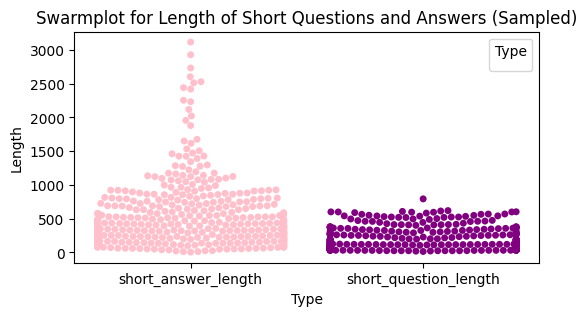

In [ ]:
# Data Visualization of Questions and Answers

import matplotlib.pyplot as plt
import seaborn as sns

length_data = pd.melt(df[['short_question_length', 'short_answer_length']],var_name='Type', value_name='Length')

# Randomly sample 1000 points for the swarmplot

sampled_data = length_data.sample(n=1000, random_state=42)
color_palette = {'short_question_length': 'purple', 'short_answer_length': 'pink'}
plt.figure(figsize=(6,3))
# sns.swarmplot(x='Type', y='Length', data=sampled_data, color='.25')

sns.swarmplot(x='Type', y='Length', data=sampled_data, palette=color_palette, hue='Type', dodge=False)
plt.legend(title='Type', loc='upper right')

plt.title('Swarmplot for Length of Short Questions and Answers (Sampled)')
plt.show()

# **MODEL TRAINING**

## TF_IDF

In [ ]:
# USING TF-IDF AND COSINE SIMILARITY TO GET ANSWERS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

filtered_df = df[df['label'] == 1]

# Split the data into training and testing sets
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)  # 80% train, 20% test

# Fit TF-IDF on the training set only
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_df['filtered_short_question_tokens'])

def get_best_answer(user_question):
    question_tfidf = tfidf_vectorizer.transform([user_question])
    similarities = cosine_similarity(question_tfidf, tfidf_matrix_train)
    best_match_idx = similarities.argmax()
    best_answer = train_df.iloc[best_match_idx]['short_answer']
    return best_answer

In [ ]:
# Test the chatbot with a sample question
user_question = "Symptoms of pregnancy"
print("Chatbot response:", get_best_answer(user_question))

Chatbot response: if a woman has a small prolactinoma there is usually no reason that she cannot conceive and have a normal pregnancy after successful medical therapy the pituitary enlarges and prolactin production increases during normal pregnancy in women without pituitary disorders women with prolactin secreting tumors may experience further pituitary enlargement and must be closely monitored during pregnancy but damage to the pituitary or eye nerves occurs in less than 1 of pregnant women with prolactinomas in women with large tumors the risk of damage to the pituitary or eye nerves is greater if a woman has already completed a successful pregnancy the likelihood of future successful pregnancies is extremely high a woman with a prolactinoma should discuss her plans to conceive with her physician so she can be carefully evaluated prior to pregnancy this evaluation typically includes a magnetic resonance imaging mri scan to assess the size of the tumor and an eye examination with mea

In [ ]:
# CALCULATING ACCURACY BASED ON COSINE SIMILARITY (TF-IDF)
similarity_threshold = 0.5

def evaluate_accuracy_with_cosine_similarity():
    correct_predictions = 0

    for idx, row in test_df.iterrows():
        user_question = row['filtered_short_question_tokens']
        expected_answer = row['short_answer']
        predicted_answer = get_best_answer(user_question)

        # Compute TF-IDF vectors for both the predicted and expected answers
        expected_answer_vec = tfidf_vectorizer.transform([expected_answer])
        predicted_answer_vec = tfidf_vectorizer.transform([predicted_answer])

        # Calculate cosine similarity
        similarity_score = cosine_similarity(expected_answer_vec, predicted_answer_vec).flatten()[0]

        # Check if similarity score meets threshold
        if similarity_score >= similarity_threshold:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / len(test_df)
    print("Chatbot accuracy based on cosine similarity:", accuracy)

# Run the evaluation
evaluate_accuracy_with_cosine_similarity()

Chatbot accuracy based on cosine similarity: 0.03343949044585987


In [ ]:
!pip install rouge-score

In [ ]:
# CALCULATING ROUGE SCORE (TF-IDF)

from rouge_score import rouge_scorer

# Generate responses for the evaluation set
test_df['generated_answer'] = test_df['short_question'].apply(get_best_answer)

# Initialize the ROUGE evaluator
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
rouge_scores = []

# Calculate ROUGE scores and extract fmeasure
for index, row in test_df.iterrows():
    reference = row['short_answer']
    generated = row['generated_answer']

    scores = scorer.score(reference, generated)
    # Extract only the fmeasure (F1-score) for averaging
    rouge_scores.append({metric: scores[metric].fmeasure for metric in scores})

# Create a DataFrame for the ROUGE scores (now with numerical values)
rouge_df = pd.DataFrame(rouge_scores)

# Calculate average ROUGE scores
average_rouge_scores = rouge_df.mean()

# Print the average ROUGE scores
print("Average ROUGE Scores:")
print(average_rouge_scores)

Average ROUGE Scores:
rouge1    0.188896
rouge2    0.029038
rougeL    0.115657
dtype: float64


In [ ]:
# USING TF-IDF AND TRANSFORMERS TO SUMMARIZE THE ANSWERS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from textblob import TextBlob
import pandas as pd
from transformers import pipeline

# Filter the dataset to include only correct answers
filtered_df = df[df['label'] == 1]

# Fit TF-IDF on the filtered lemmatized question tokens
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['filtered_short_question_tokens'])

# Load summarization pipeline with a specified model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)  # Use device=-1 for CPU

# Function to get the best answer based on a user question
def get_best_answer(user_question):
    # Transform the user question using the TF-IDF vectorizer
    question_tfidf = tfidf_vectorizer.transform([user_question])

    # Calculate cosine similarity between the user question and dataset questions
    similarities = cosine_similarity(question_tfidf, tfidf_matrix)

    # Find the index of the most similar question
    best_match_idx = similarities.argmax()

    # Retrieve the corresponding answer from the dataset
    best_answer = filtered_df.iloc[best_match_idx]['short_answer']

    # Summarize the answer if it's lengthy
    if len(best_answer.split()) > 100:  # You can adjust this threshold
        summarized_answer = summarizer(best_answer, max_length=100, min_length=50, do_sample=False)[0]['summary_text']
    else:
        summarized_answer = best_answer

    # Grammar correction
    # corrected_answer = str(TextBlob(summarized_answer).correct())

    return summarized_answer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Test the chatbot with a sample question
user_question = "Symptoms of pregnancy"
print("Chatbot response:", get_best_answer(user_question))

Chatbot response: If a woman has a small prolactinoma there is usually no reason that she cannot conceive and have a normal pregnancy after successful medical therapy. Pituitary enlarges during normal pregnancy in women without pituitary disorders. Damage to the pituitaries or eye nerves occurs in less than 1 of pregnant women with prolact inomas in women with large tumors.


## WORD_2_VEC

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# USING WORD2VEC
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import ast

filtered_df = df[df['label'] == 1]
#tokenized_sentences = filtered_df['filtered_short_question_tokens'].tolist()
tokenized_sentences = [ast.literal_eval(sentence) for sentence in filtered_df['filtered_short_question_tokens'].tolist()]

# Train or load Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=1000, window=5, min_count=1, workers=4)

def sentence_vector(sentence, model):
    words = word_tokenize(sentence.lower())
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Getting best answer with Word2Vec
def get_best_answer_word2vec(user_question):
    user_vector = sentence_vector(user_question, model)
    best_idx = -1
    max_similarity = -1
    for idx, row in filtered_df.iterrows():
        question_vector = sentence_vector(row['filtered_short_question_tokens'], model)
        similarity = cosine_similarity([user_vector], [question_vector])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            best_idx = idx
    return filtered_df.iloc[best_idx]['short_answer'] if best_idx >= 0 else "I'm sorry, I don't have an answer for that."

# Test the chatbot with Word2Vec similarity
user_question = "antibiotic"
print("Chatbot response:", get_best_answer_word2vec(user_question))


Chatbot response: yes it can even after you have finished the prescription for antibiotics


In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import ast

# Filter the dataset to include only correct answers
filtered_df = df[df['label'] == 1]

# Tokenize the sentences for Word2Vec training
tokenized_sentences = [ast.literal_eval(sentence) for sentence in filtered_df['filtered_short_question_tokens'].tolist()]

# Train the Word2Vec model on the dataset
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Define a minimum similarity threshold
similarity_threshold = 0.1

def sentence_vector(sentence, model):
    words = word_tokenize(sentence.lower())
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Function to get the best answer based on Word2Vec similarity
def get_best_answer_word2vec(user_question):
    # Calculate the vector for the user question
    user_vector = sentence_vector(user_question, model)

    best_idx = -1
    max_similarity = -1

    # Iterate over each question in the dataset to find the best match
    for idx, row in filtered_df.iterrows():
        question_vector = sentence_vector(row['filtered_short_question_tokens'], model)
        similarity = cosine_similarity([user_vector], [question_vector])[0][0]

        # Update best match if current similarity is higher
        if similarity > max_similarity:
            max_similarity = similarity
            best_idx = idx

    # Check if the highest similarity exceeds the threshold
    if max_similarity >= similarity_threshold:
        return filtered_df.iloc[best_idx]['short_answer']
    else:
        return "I'm sorry, I don't have an answer for that."

# Test the chatbot with a sample question
user_question = "Symptoms of fever"
print("Chatbot response:", get_best_answer_word2vec(user_question))


Chatbot response: I'm sorry, I don't have an answer for that.


## BERT - SENTENCE TRANSFORMER

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
!pip install language_tool_python

In [ ]:
# USING BERT SENTENCE TRANSFORMERS

from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import language_tool_python
from nltk.tokenize import sent_tokenize
import re

# Initialize model and language tool
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
tool = language_tool_python.LanguageTool('en')

# Prepare filtered dataset with embeddings
filtered_df = df[df['label'] == 1]
filtered_df['embedding'] = filtered_df['short_answer'].apply(lambda x: sentence_model.encode(x))

# Load BART model for summarization and rephrasing
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to clean up repeated words or phrases
def clean_repetitions(text):
    # Remove any consecutive repeated phrases (like "fever fever")
    return re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

# Function to fix grammar and punctuation
def correct_grammar(text):
    matches = tool.check(text)
    return language_tool_python.utils.correct(text, matches)

# Function to rephrase with summarization pipeline
def rephrase_with_summarization(text):
    summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
    return summary[0]['summary_text']

# Integrate this into the answer flow
def get_best_answer_with_readability(user_question, similarity_threshold=0.4):
    # Find best answer as before, without grammar tool
    user_embedding = sentence_model.encode(user_question)
    max_similarity = -1
    best_answer = "I'm sorry, I don't have an answer for that."

    for idx, row in filtered_df.iterrows():
        answer_embedding = row['embedding']
        similarity = cosine_similarity([user_embedding], [answer_embedding])[0][0]

        if similarity > similarity_threshold and similarity > max_similarity:
            max_similarity = similarity
            best_answer = row['short_answer']

    # Clean and rephrase for better readability
    best_answer = clean_repetitions(best_answer)
    best_answer = correct_grammar(best_answer)
    readable_answer = rephrase_with_summarization(best_answer)
    return readable_answer

# Example usage
user_question = "What should I do if I have a fever?"
print("Chatbot response:", get_best_answer_with_readability(user_question))


<ipython-input-50-904607f4ed8f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['embedding'] = filtered_df['short_answer'].apply(lambda x: sentence_model.encode(x))
Your max_length is set to 100, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


Chatbot response: Fever that does not respond to antipyretics could be a sign of a problem that needs further evaluation. Do you have any other symptoms with fever?


In [ ]:
# Example usage
user_question = "Symptoms of pregnancy?"
print("Chatbot response:", get_best_answer_with_readability(user_question))

Your max_length is set to 100, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


Chatbot response: Some of the symptoms may be caused by other things besides being pregnant. The only way to tell for sure is with a pregnancy test spotting and cramping.


In [ ]:
# CALCULATING ROUGE SCORE AND ACCURACY (FOR BERT BASED SENTENCE TRANSFORMER)
from sklearn.model_selection import train_test_split
from rouge_score import rouge_scorer
import numpy as np

# Split the dataset into train and test sets
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)

# Initialize ROUGE scorer with lowercase rouge types
rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)  # Changed to lowercase

# Function to calculate ROUGE score and accuracy (simplified version)
def evaluate_model_fast(train_df, test_df):
    predictions = []
    references = []
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
    accuracy_count = 0
    similarity_threshold = 0.5  # Define a threshold for considering correct answers

    # Prepare embeddings for train data (to find the best answers)
    train_df['embedding'] = train_df['filtered_short_question_tokens'].apply(lambda x: sentence_model.encode(x))

    # Iterate through the test set
    for _, row in test_df.iterrows():
        user_question = row['filtered_short_question_tokens']
        actual_answer = row['short_answer']

        # Generate a prediction using the chatbot
        user_embedding = sentence_model.encode(user_question)
        max_similarity = -1
        best_answer = "I'm sorry, I don't have an answer for that."

        for idx, train_row in train_df.iterrows():
            answer_embedding = train_row['embedding']
            similarity = cosine_similarity([user_embedding], [answer_embedding])[0][0]
            if similarity > max_similarity:
                max_similarity = similarity
                best_answer = train_row['short_answer']

        # Use the raw best answer as the prediction
        predicted_answer = best_answer

        # Append predictions and references for ROUGE
        predictions.append(predicted_answer)
        references.append(actual_answer)

        # Compute accuracy based on similarity threshold
        similarity_to_actual = cosine_similarity(
            [sentence_model.encode(predicted_answer)], [sentence_model.encode(actual_answer)]
        )[0][0]
        if similarity_to_actual >= similarity_threshold:
            accuracy_count += 1

        # Calculate ROUGE scores
        score = rouge.score(predicted_answer, actual_answer)
        for key in rouge_scores:
            rouge_scores[key].append(score[key].fmeasure)

    # Compute overall ROUGE scores and accuracy
    avg_rouge_scores = {key: np.mean(values) for key, values in rouge_scores.items()}
    accuracy = accuracy_count / len(test_df)

    return avg_rouge_scores, accuracy

# Evaluate the model
rouge_scores, accuracy = evaluate_model_fast(train_df, test_df)

# Print evaluation metrics
print("ROUGE Scores:", rouge_scores)
print("Accuracy:", accuracy)


ROUGE Scores: {'rouge1': 0.19901376101730406, 'rouge2': 0.034104959826320606, 'rougeL': 0.1225034573211962}
Accuracy: 0.22770700636942676


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [ ]:
# Function to calculate BLEU score for a single prediction
def calculate_bleu_score(predictions, references):
    smooth = SmoothingFunction().method4  # Smoothing to handle short sentences
    bleu_scores = []

    for pred, ref in zip(predictions, references):
        # Tokenize reference and prediction
        ref_tokens = [ref.split()]  # Reference must be a list of lists
        pred_tokens = pred.split()

        # Compute BLEU score
        bleu_score = sentence_bleu(ref_tokens, pred_tokens, smoothing_function=smooth)
        bleu_scores.append(bleu_score)

    # Compute average BLEU score
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    return avg_bleu, bleu_scores

# Generate predictions and references from test_df
predictions = []
references = []

# Prepare embeddings for the training data
train_df['embedding'] = train_df['filtered_short_question_tokens'].apply(lambda x: sentence_model.encode(x))

# Iterate through the test set
for _, row in test_df.iterrows():
    user_question = row['filtered_short_question_tokens']
    actual_answer = row['short_answer']

    # Embed the user question
    user_embedding = sentence_model.encode(user_question)

    # Initialize variables to find the best match
    max_similarity = -1
    best_answer = "I'm sorry, I don't have an answer for that."

    for _, train_row in train_df.iterrows():
        answer_embedding = train_row['embedding']
        similarity = cosine_similarity([user_embedding], [answer_embedding])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            best_answer = train_row['short_answer']

    # Add the predicted and actual answers to lists
    predictions.append(best_answer)
    references.append(actual_answer)

# Calculate BLEU score
average_bleu, all_bleu_scores = calculate_bleu_score(predictions, references)

print("Average BLEU Score:", average_bleu)

Average BLEU Score: 0.022456256613774137


In [ ]:
pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
# CALCULATING PRECISION, RECALL AND F1-SCORE
from bert_score import score
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize the BERT-based Sentence Transformer model
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')  # Or any other pre-trained model

# Example function to generate chatbot response
def generate_chatbot_response(user_question, train_df):
    user_embedding = sentence_model.encode(user_question)
    max_similarity = -1
    best_answer = "I'm sorry, I don't have an answer for that."

    for _, train_row in train_df.iterrows():
        answer_embedding = train_row['embedding']
        similarity = cosine_similarity([user_embedding], [answer_embedding])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            best_answer = train_row['short_answer']

    return best_answer

train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)

# Compute embeddings for training data
train_df['embedding'] = train_df['filtered_short_question_tokens'].apply(lambda x: sentence_model.encode(x))

# Lists to hold predictions and references
predictions = []
references = []

# Generate predictions for the test set
for _, row in test_df.iterrows():
    user_question = row['filtered_short_question_tokens']
    actual_answer = row['short_answer']

    # Generate prediction
    predicted_answer = generate_chatbot_response(user_question, train_df)

    predictions.append(predicted_answer)
    references.append(actual_answer)

# Calculate BERTScore
P, R, F1 = score(predictions, references, lang="en", verbose=True)

# Compute average BERTScore values
avg_precision = P.mean().item()
avg_recall = R.mean().item()
avg_f1 = F1.mean().item()

# Print the BERTScore results
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/18 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/10 [00:00<?, ?it/s]

done in 1380.97 seconds, 0.45 sentences/sec
Average Precision: 0.8205
Average Recall: 0.8202
Average F1 Score: 0.8201


#**API CREATION**

# FAST - API

In [7]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.6 MB/s eta 0:00:00


In [13]:
!pip install language_tool_python

In [16]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
# ADDING CORS
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware  # Import CORS middleware
from pydantic import BaseModel
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from transformers import pipeline
from sentence_transformers import SentenceTransformer
import language_tool_python
from nltk.tokenize import sent_tokenize
import re

# Initialize FastAPI app
app = FastAPI()

# Add CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allow all origins (replace "*" with specific origins for production)
    allow_credentials=True,
    allow_methods=["*"],  # Allow all HTTP methods
    allow_headers=["*"],  # Allow all headers
)

# Load models and initialize variables
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
tool = language_tool_python.LanguageTool('en')

# Prepare filtered dataset with embeddings
filtered_df = df[df['label'] == 1]
filtered_df['filtered_short_question_tokens'] = filtered_df['filtered_short_question_tokens'].astype(str)
filtered_df['embedding'] = filtered_df['short_answer'].apply(lambda x: sentence_model.encode(x))

# Load BART model for summarization and rephrasing
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define utility functions
def clean_repetitions(text):
    return re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

def correct_grammar(text):
    matches = tool.check(text)
    return language_tool_python.utils.correct(text, matches)

def rephrase_with_summarization(text):
    summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
    return summary[0]['summary_text']

def get_best_answer_with_readability(user_question, similarity_threshold=0.4):
    user_embedding = sentence_model.encode(user_question)
    max_similarity = -1
    best_answer = "I'm sorry, I don't have an answer for that."

    for idx, row in filtered_df.iterrows():
        answer_embedding = row['embedding']
        similarity = cosine_similarity([user_embedding], [answer_embedding])[0][0]

        if similarity > similarity_threshold and similarity > max_similarity:
            max_similarity = similarity
            best_answer = row['short_answer']

    best_answer = clean_repetitions(best_answer)
    best_answer = correct_grammar(best_answer)
    readable_answer = rephrase_with_summarization(best_answer)
    return readable_answer

# Define API endpoint
class QuestionRequest(BaseModel):
    question: str

@app.post("/predict")
async def predict(request: QuestionRequest):
    user_question = request.question
    if not user_question:
        raise HTTPException(status_code=400, detail="No question provided")

    return {"answer": get_best_answer_with_readability(user_question)}

<ipython-input-19-399304c6340a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['filtered_short_question_tokens'] = filtered_df['filtered_short_question_tokens'].astype(str)
<ipython-input-19-399304c6340a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['embedding'] = filtered_df['short_answer'].apply(lambda x: sentence_model.encode(x))
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.

In [20]:
!pip install nest-asyncio  # Required for Colab to run asynchronous code
!pip install pyngrok      # Required for ngrok tunneling

import nest_asyncio
from pyngrok import ngrok
import uvicorn

# Apply nest_asyncio to avoid runtime errors in Colab
nest_asyncio.apply()

NGROK_AUTH_TOKEN = "2ovjIAIOO5fsbgSLxmOIbwtCNex_7YE7ttdPnj9nhUJb3sj2L"
ngrok.set_auth_token(NGROK_AUTH_TOKEN) # Set your authtoken

# Set up ngrok tunnel
public_url = ngrok.connect(8000)
print("Public URL:", public_url)

# Run the app using Uvicorn
uvicorn.run(app, host="0.0.0.0", port=8000)

Public URL: NgrokTunnel: "https://92f1-34-143-150-94.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [1193]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     223.237.36.28:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     223.237.36.28:0 - "GET /openapi.json HTTP/1.1" 200 OK


Your max_length is set to 100, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


INFO:     223.237.36.28:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     223.237.36.28:0 - "OPTIONS /chat HTTP/1.1" 200 OK
INFO:     223.237.36.28:0 - "POST /chat HTTP/1.1" 404 Not Found
INFO:     223.237.36.28:0 - "OPTIONS /predict HTTP/1.1" 200 OK


Your max_length is set to 100, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


INFO:     223.237.36.28:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     223.237.36.28:0 - "OPTIONS /predict HTTP/1.1" 200 OK


Your max_length is set to 100, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


INFO:     223.237.36.28:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     223.237.36.28:0 - "OPTIONS /predict HTTP/1.1" 200 OK
INFO:     223.237.36.28:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     2401:4900:30c1:379a:0:4a:86e9:ee01:0 - "GET /predict HTTP/1.1" 405 Method Not Allowed


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1193]
